<a href="https://colab.research.google.com/github/SantoshMahara/Nural_networks_DeepLearning/blob/main/15thFeb_CNN_Dev.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **What is Pneumonia?**
**Pneumonia is an inflammatory condition of the `lung affecting primarily the small air sacs known as alveoli`. Symptoms typically include some combination of productive or dry cough, chest pain, fever and difficulty breathing. The severity of the condition is variable. Pneumonia is usually caused by infection with viruses or bacteria and less commonly by other microorganisms, certain medications or conditions such as autoimmune diseases.Risk factors include cystic fibrosis, chronic obstructive pulmonary disease (COPD), asthma, diabetes, heart failure, a history of smoking, a poor ability to cough such as following a stroke and a weak immune system. Diagnosis is often based on symptoms and physical examination. Chest X-ray, blood tests, and culture of the sputum may help confirm the diagnosis.The disease may be classified by where it was acquired, such as community- or hospital-acquired or healthcare-associated pneumonia.**

# **Importing Dataset from Kaggle**

In [ ]:
!pip install kagglehub

In [ ]:
!pip install kagglehub
import kagglehub

# Download latest version
path = kagglehub.dataset_download("paultimothymooney/chest-xray-pneumonia")

print("Path to dataset files:", path)

100%|██████████| 2.29G/2.29G [01:45<00:00, 23.3MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/paultimothymooney/chest-xray-pneumonia/versions/2


In [ ]:
dataset_dir = "/root/.cache/kagglehub/datasets/paultimothymooney/chest-xray-pneumonia/versions/2/chest_xray/chest_xray"

# **1. Requirement Phase**

### **1.1. Configuration Libraries**

In [ ]:
import warnings
warnings.filterwarnings("ignore")

### **1.2. Classical Libraries**

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### **1.3. Machine Learning Libraries**

In [ ]:
import os
import cv2 # Computer Vision (Images) / Manipulation
import keras
from sklearn.metrics import *
from keras.models import Sequential
from keras.callbacks import ReduceLROnPlateau
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout, BatchNormalization

# **Dataset Description**

* **There are three folders in the dataset**
  * **Train**
  * **Test**
  * **Validation**

In [ ]:
# Define the Labels for our data
labels = ["PNEUMONIA", "NORMAL"]
# Defining the image
image_size = 150

### **Defining function for getting images**

In [ ]:
def get_training_data(data_dir):
  data = []

  for x in labels:
    path = os.path.join(data_dir, x)
    class_num = labels.index(x)

    for img in os.listdir(path):
      try:
        img_arr = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
        resized_arr = cv2.resize(img_arr, (image_size, image_size))
        data.append([resized_arr, class_num])
      except Exception as e:
        print(e)
  return np.array(data, dtype=object)

### **Loading the dataset**

In [ ]:
# Training
train = get_training_data("/root/.cache/kagglehub/datasets/paultimothymooney/chest-xray-pneumonia/versions/2/chest_xray/train")
# Testing
test = get_training_data("/root/.cache/kagglehub/datasets/paultimothymooney/chest-xray-pneumonia/versions/2/chest_xray/test")
# Validation
validation = get_training_data("/root/.cache/kagglehub/datasets/paultimothymooney/chest-xray-pneumonia/versions/2/chest_xray/val")

### **Data Visualization and Processing**

In [ ]:
a = []

for x in train:
  if(x[1] == 0):
    a.append("PNEUMONIA")
  else:
    a.append("NORMAL")


<Axes: xlabel='count'>

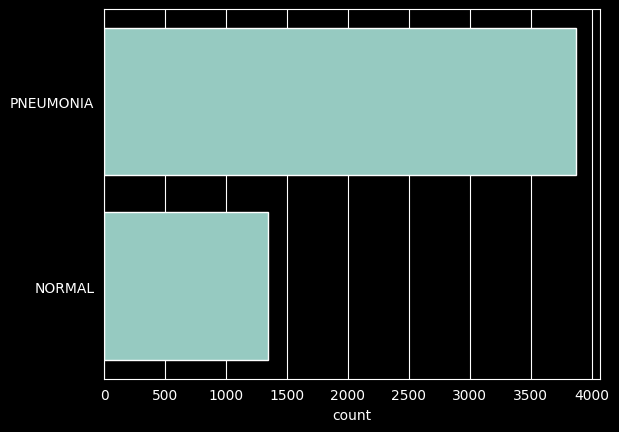

In [ ]:
sns.set_style("darkgrid")
plt.style.use("dark_background")
sns.countplot(a)

**So, in this case the data is imbalanced. To increase the number of training examples, we will use `data augmentation`**

### **Preview the image**

Text(0.5, 1.0, 'NORMAL')

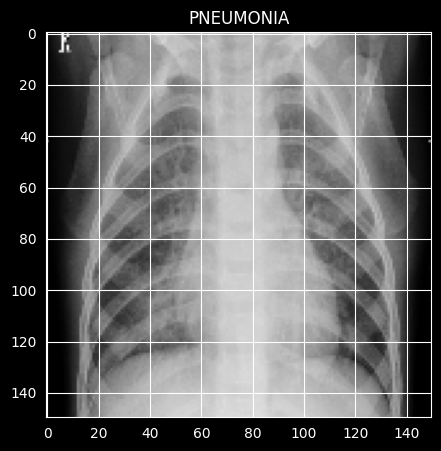

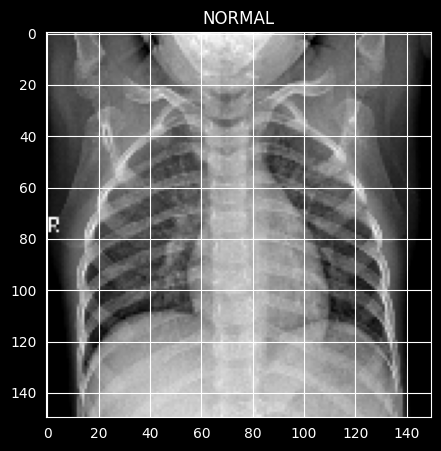

In [ ]:
plt.figure(figsize = (5, 5))
plt.imshow(train[0][0], cmap = "gray")
plt.title(labels[train[0][1]])

plt.figure(figsize = (5, 5))
plt.imshow(train[-1][0], cmap = "gray")
plt.title(labels[train[-1][1]])

### **Training and Testing Dataset**

In [ ]:
x_train = []
y_train = []

x_val = []
y_val = []

x_test = []
y_test = []

In [ ]:
for feat, label in train:
  x_train.append(feat)
  y_train.append(label)

for feat, label in validation:
  x_val.append(feat)
  y_val.append(label)

for feat, label in test:
  x_test.append(feat)
  y_test.append(label)

### **Normalization**

In [ ]:
x_train = np.array(x_train) / 255

x_val = np.array(x_val) / 255

x_test = np.array(x_test) / 255

#### **Reshape for better convergence**

In [ ]:
x_train = x_train.reshape(-1, image_size, image_size, 1)
y_train = np.array(y_train)

x_test = x_test.reshape(-1, image_size, image_size, 1)
y_test = np.array(y_test)

x_val = x_val.reshape(-1, image_size, image_size, 1)
y_val = np.array(y_val)

* **Reshaping: Change the data's shape (dimension), structure changes (NO pixel value changes)**


* **Resizing: Adjusting the size of the image (height and width), pixel value are getting modified**

## **Data Augmentation**

In [ ]:
datagen = ImageDataGenerator(
    rotation_range = 30,
    zoom_range = 0.2,
    width_shift_range = 0.1,
    height_shift_range = 0.1,
    horizontal_flip = True,
    vertical_flip = False)

In [ ]:
datagen.fit(x_train)

**For Data Generation**
  * **Randomly rotate some training images to 30 degree**
  * **Randomly Zoom by 20%**
  * **Shift Horizontally by 10%**
  * **Shift Vertically by 10%**

# **Network Building**

In [ ]:
model = Sequential()

model.add(Conv2D(32, (3, 3), strides = 1, padding = "same", activation = "relu", input_shape = (150, 150, 1)))
model.add(BatchNormalization())
model.add(MaxPool2D((2, 2), strides = 2, padding = "same"))

model.add(Conv2D(64, (3, 3), strides = 1, padding = "same", activation = "relu"))
model.add(Dropout(0.1))
model.add(BatchNormalization())
model.add(MaxPool2D((2, 2), strides = 2, padding = "same"))

model.add(Conv2D(64, (3, 3), strides = 1, padding = "same", activation = "relu"))
model.add(BatchNormalization())
model.add(MaxPool2D((2, 2), strides = 2, padding = "same"))

model.add(Conv2D(128, (3, 3), strides = 1, padding = "same", activation = "relu"))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(MaxPool2D((2, 2), strides = 2, padding = "same"))

model.add(Conv2D(256, (3, 3), strides = 1, padding = "same", activation = "relu"))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(MaxPool2D((2, 2), strides = 2, padding = "same"))

model.add(Flatten())
model.add(Dense(units = 128, activation = "relu"))

model.add(Dropout(0.2))

model.add(Dense(units = 1, activation = "sigmoid"))
model.compile(optimizer = "rmsprop", loss = "binary_crossentropy", metrics =["accuracy"])

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 150, 150, 32)        │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 150, 150, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 75, 75, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 75, 75, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 75, 75, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 75, 75, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 38, 38, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 38, 38, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 38, 38, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 19, 19, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 19, 19, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 19, 19, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 19, 19, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 10, 10, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 10, 10, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 10, 10, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 10, 10, 256)         │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 5, 5, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 6400)                │              

 Total params: 1,246,401 (4.75 MB)

 Trainable params: 1,245,313 (4.75 MB)

 Non-trainable params: 1,088 (4.25 KB)

In [ ]:
learning_rate_reduction = ReduceLROnPlateau(monitor = "val_accurary", patience = 2, verbose = 1, factor = 0.3, min_lr = 0.000001)

### **Fit the model**

In [ ]:
history = model.fit(
    datagen.flow(x_train, y_train, batch_size = 32),
    epochs = 12,
    validation_data = datagen.flow(x_val, y_val),
    callbacks = [learning_rate_reduction])

Epoch 1/12
163/163 ━━━━━━━━━━━━━━━━━━━━ 26s 85ms/step - accuracy: 0.7959 - loss: 0.9933 - val_accuracy: 0.5000 - val_loss: 26.7681 - learning_rate: 0.0010
Epoch 2/12
163/163 ━━━━━━━━━━━━━━━━━━━━ 15s 89ms/step - accuracy: 0.8899 - loss: 0.3116 - val_accuracy: 0.5000 - val_loss: 34.6309 - learning_rate: 0.0010
Epoch 3/12
163/163 ━━━━━━━━━━━━━━━━━━━━ 13s 81ms/step - accuracy: 0.9040 - loss: 0.3054 - val_accuracy: 0.5000 - val_loss: 61.1667 - learning_rate: 0.0010
Epoch 4/12
163/163 ━━━━━━━━━━━━━━━━━━━━ 13s 78ms/step - accuracy: 0.9288 - loss: 0.2056 - val_accuracy: 0.5000 - val_loss: 0.8479 - learning_rate: 0.0010
Epoch 5/12
163/163 ━━━━━━━━━━━━━━━━━━━━ 13s 77ms/step - accuracy: 0.9326 - loss: 0.1813 - val_accuracy: 0.5000 - val_loss: 11.3703 - learning_rate: 0.0010
Epoch 6/12
163/163 ━━━━━━━━━━━━━━━━━━━━ 12s 76ms/step - accuracy: 0.9312 - loss: 0.1858 - val_accuracy: 0.5625 - val_loss: 1.2462 - learning_rate: 0.0010
Epoch 7/12
163/163 ━━━━━━━━━━━━━━━━━━━━ 12s 75ms/step - accuracy: 0.9321

In [ ]:
print(f"Loss of Model: {model.evaluate(x_test, y_test)[0]}")

20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.7639 - loss: 0.5388
Loss of Model: 0.5238670706748962


In [ ]:
print(f"Accuracy of Model: {model.evaluate(x_test, y_test)[1]*100}%")

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7639 - loss: 0.5388
Accuracy of Model: 79.00640964508057%


## **Analysis of the Model (Post Modelling Procedure)**

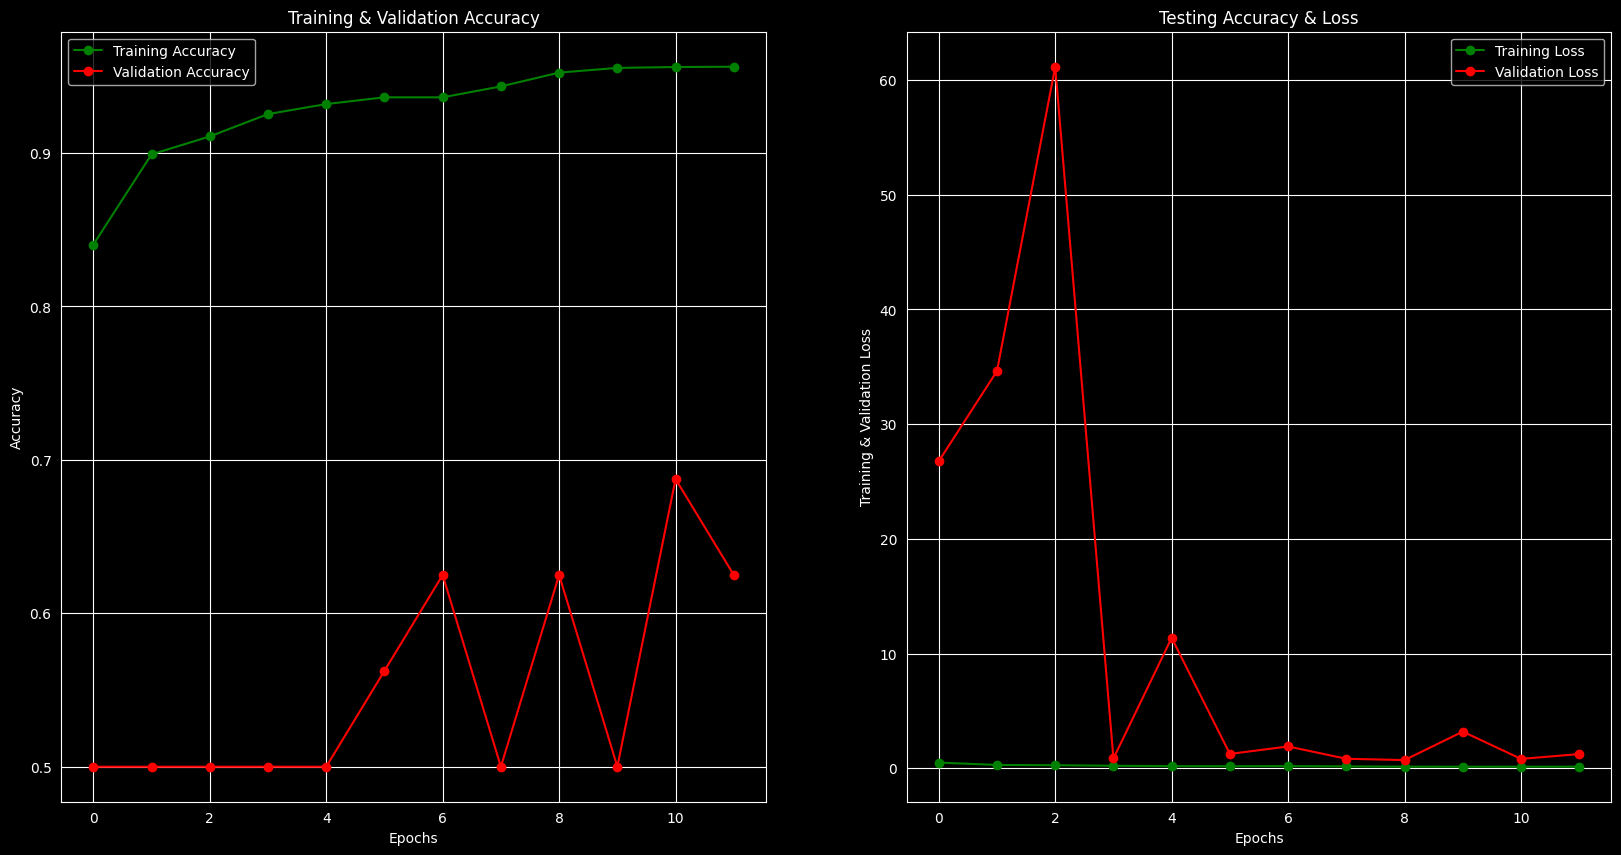

In [ ]:
epochs = [i for i in range(12)]
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']
fig.set_size_inches(20,10)

ax[0].plot(epochs , train_acc , 'go-' , label = 'Training Accuracy')
ax[0].plot(epochs , val_acc , 'ro-' , label = 'Validation Accuracy')
ax[0].set_title('Training & Validation Accuracy')
ax[0].legend()
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("Accuracy")

ax[1].plot(epochs , train_loss , 'g-o' , label = 'Training Loss')
ax[1].plot(epochs , val_loss , 'r-o' , label = 'Validation Loss')
ax[1].set_title('Testing Accuracy & Loss')
ax[1].legend()
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("Training & Validation Loss")
plt.show()

## **Prediction**

In [ ]:
predictions = model.predict(x_test)
predictions = predictions.reshape(1,-1)[0]
predictions[:15]

20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step


array([4.6143375e-02, 5.7810757e-05, 1.3794506e-03, 8.7681258e-01,
       1.9708027e-01, 9.3044436e-01, 2.8486112e-01, 1.0939397e-02,
       1.5546106e-01, 3.9534819e-01, 3.7791649e-01, 1.7568559e-04,
       3.8513911e-01, 7.7385932e-02, 5.7510315e-03], dtype=float32)

In [ ]:
predictions = (predictions > 0.5).astype(int)
predictions[:15]

array([0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
print(classification_report(y_test, predictions, target_names = labels))

              precision    recall  f1-score   support

   PNEUMONIA       0.92      0.72      0.81       390
      NORMAL       0.66      0.90      0.76       234

    accuracy                           0.79       624
   macro avg       0.79      0.81      0.79       624
weighted avg       0.83      0.79      0.79       624



In [ ]:
correct = np.nonzero(predictions == y_test)[0]
incorrect = np.nonzero(predictions != y_test)[0]

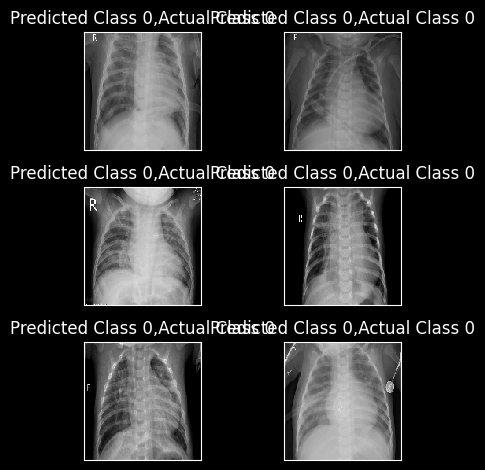

In [ ]:
i = 0
for c in correct[:6]:
    plt.subplot(3,2,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_test[c].reshape(150,150), cmap="gray", interpolation='none')
    plt.title("Predicted Class {},Actual Class {}".format(predictions[c], y_test[c]))
    plt.tight_layout()
    i += 1

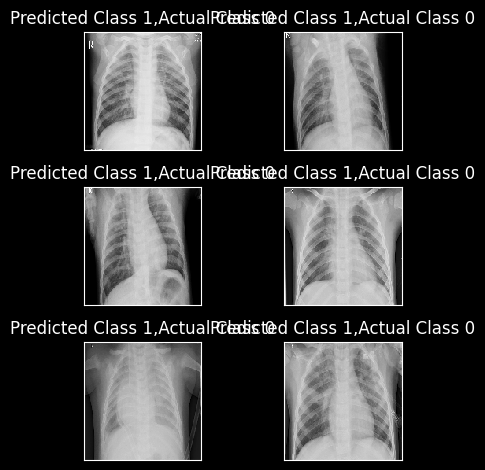

In [ ]:
i = 0
for c in incorrect[:6]:
    plt.subplot(3,2,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_test[c].reshape(150,150), cmap="gray", interpolation='none')
    plt.title("Predicted Class {},Actual Class {}".format(predictions[c], y_test[c]))
    plt.tight_layout()
    i += 1